In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('data.csv', sep=';')
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df["month"] = df["Date"].dt.month
df.drop(["Date", "Note", "Pointée", "Description", "Compte"], axis=1, inplace=True)
df.head()

,Montant,Catégorie,Sous-Catégorie,month
0,-22.52,Alimentation & Restau.,Supermarché / Epicerie,7
1,-9.99,Loisirs & Sorties,Divertissements,7
2,10.00,Entrées d'argent,Autres rentrées,6
3,-10.99,Dépenses pro,Services en ligne,6
4,-23.24,Loisirs & Sorties,Divertissements,6


## Clean dataframe 

In [3]:
df = df[df["Catégorie"] != "Entrées d'argent"]
df = df[df["Sous-Catégorie"] != "Virements internes"]
df = df[df["Sous-Catégorie"] != "Débit mensuel carte"]
df["Montant"] = df["Montant"].apply(lambda x: abs(x))

## Mean over the year

### By category

Dépense moyenne par mois: 2676.14€


,Montant
Catégorie,
Banque,997.201429
Loisirs & Sorties,456.084286
Alimentation & Restau.,351.094286
Auto & Transports,242.710000
Logement,223.768571
Achats & Shopping,197.030000
Abonnements,76.715714
Divers,59.744286
Dépenses pro,33.341429


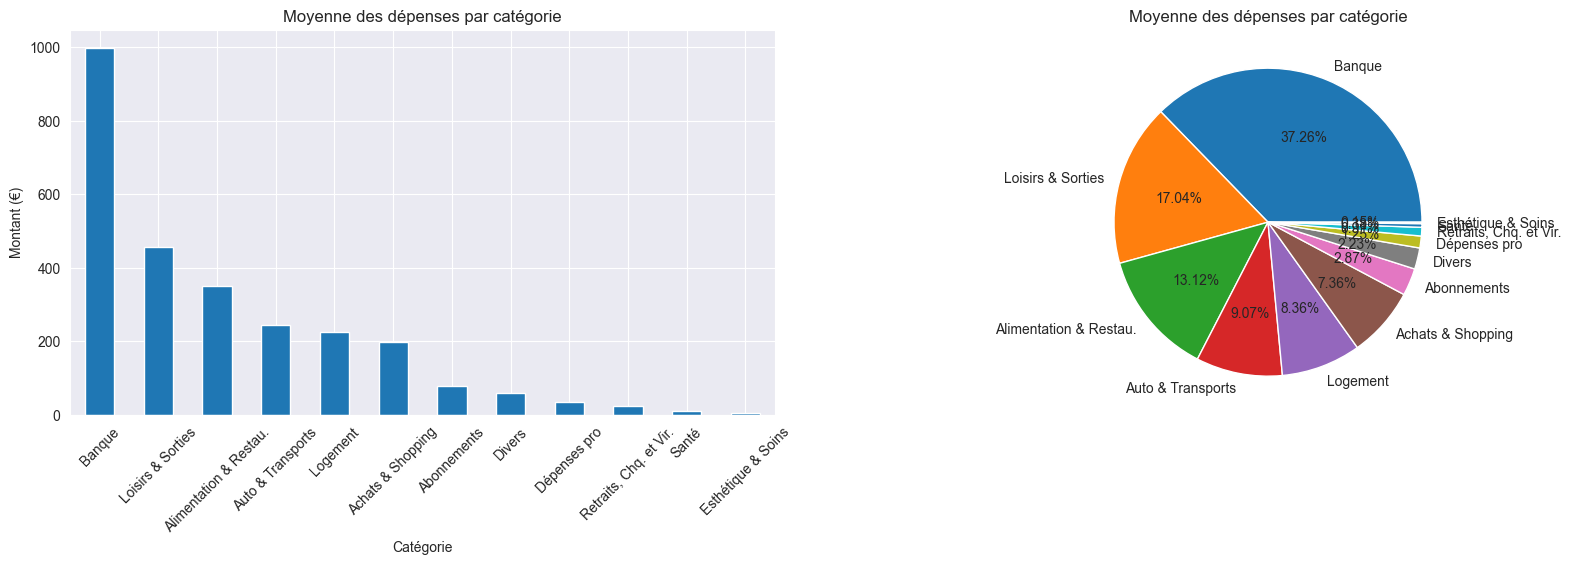

In [4]:
mean_c_df = df.drop(["Sous-Catégorie"], axis=1)
mean_c_df = mean_c_df.groupby(["month", "Catégorie"]).sum()
mean_c_df = mean_c_df.groupby(["Catégorie"]).sum() / 7
mean_c_df = mean_c_df.sort_values(by="Montant", ascending=False)

# subplot 1, 2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

mean_c_df.plot(
    ax=ax1,
    kind="bar",
    # figsize=(20, 5),
    grid=True,
    title="Moyenne des dépenses par catégorie",
    xlabel="Catégorie",
    ylabel="Montant (€)",
    legend=False,
    rot=45,
)

mean_c_df.plot.pie(
    ax=ax2,
    y="Montant",
    title="Moyenne des dépenses par catégorie",
    autopct="%.2f%%",
    legend=False,
    ylabel="",
)

total = mean_c_df["Montant"].sum()
print(f"Dépense moyenne par mois: {total:.2f}€")

mean_c_df

### By sub category

,Montant
Sous-Catégorie,
Remboursement emprunt,974.630000
Billets de train,188.857143
Supermarché / Epicerie,185.784286
Charges diverses,181.247143
Bars / Clubs,145.300000


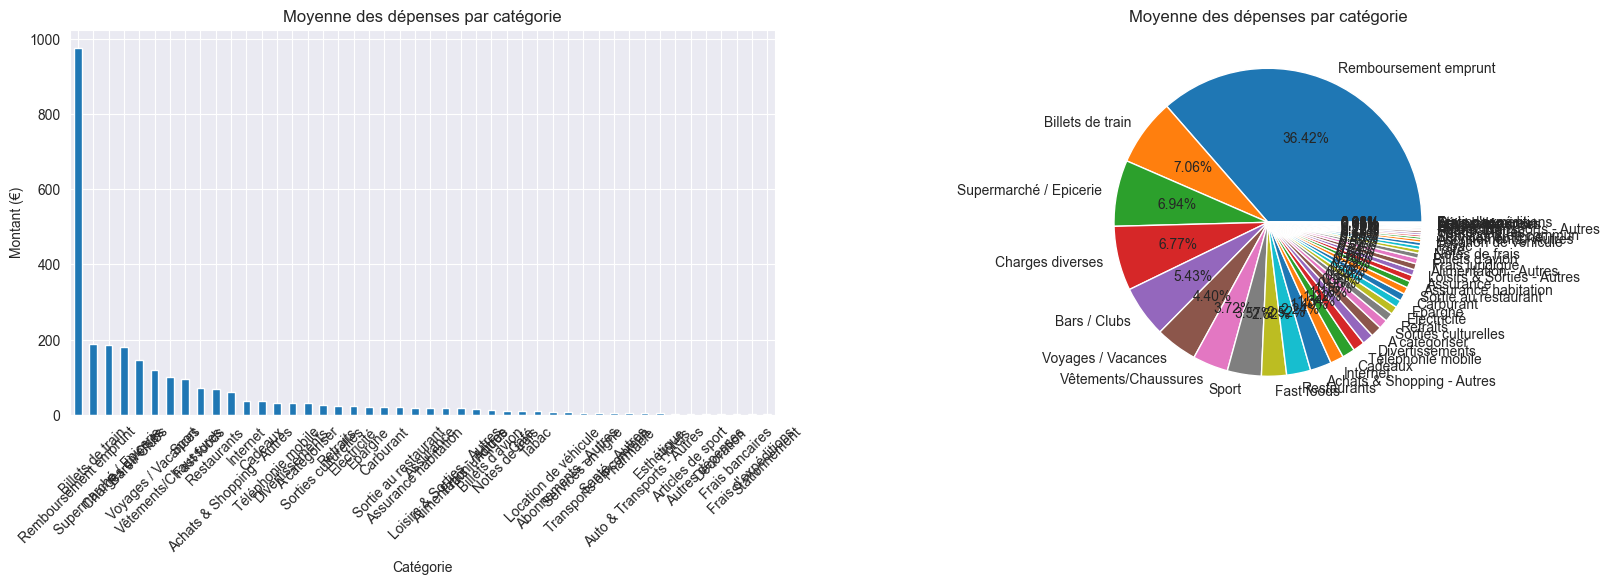

In [5]:
mean_sc_df = df.drop(["Catégorie"], axis=1)
# mean_sc_df = mean_sc_df[mean_sc_df["Sous-Catégorie"] == "Vêtements/Chaussures"]
# mean_sc_df = mean_sc_df[mean_sc_df["Sous-Catégorie"] != "Remboursement emprunt"]
mean_sc_df = mean_sc_df.groupby(["month", "Sous-Catégorie"]).sum()
mean_sc_df = mean_sc_df.groupby(["Sous-Catégorie"]).sum() / 7
mean_sc_df = mean_sc_df.sort_values(by="Montant", ascending=False)
# mean_sc_df = mean_sc_df[mean_sc_df["Montant"] > 10 ]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

mean_sc_df.plot(
    ax=ax1,
    kind="bar",
    figsize=(20, 5),
    grid=True,
    title="Moyenne des dépenses par catégorie",
    xlabel="Catégorie",
    ylabel="Montant (€)",
    legend=False,
    rot=45,
)

mean_sc_df.plot.pie(
    ax=ax2,
    y="Montant",
    title="Moyenne des dépenses par catégorie",
    autopct="%.2f%%",
    legend=False,
    ylabel="",
)


mean_sc_df.head()

## Sum over the year

Montant
month Catégorie                      
1     Abonnements               66.97
      Achats & Shopping        278.78
      Alimentation & Restau.   352.88
      Auto & Transports         52.62
      Banque                  1051.63
      Divers                    27.65
      Logement                 430.44
      Loisirs & Sorties        682.27
      Santé                     41.07
2     Abonnements               84.96

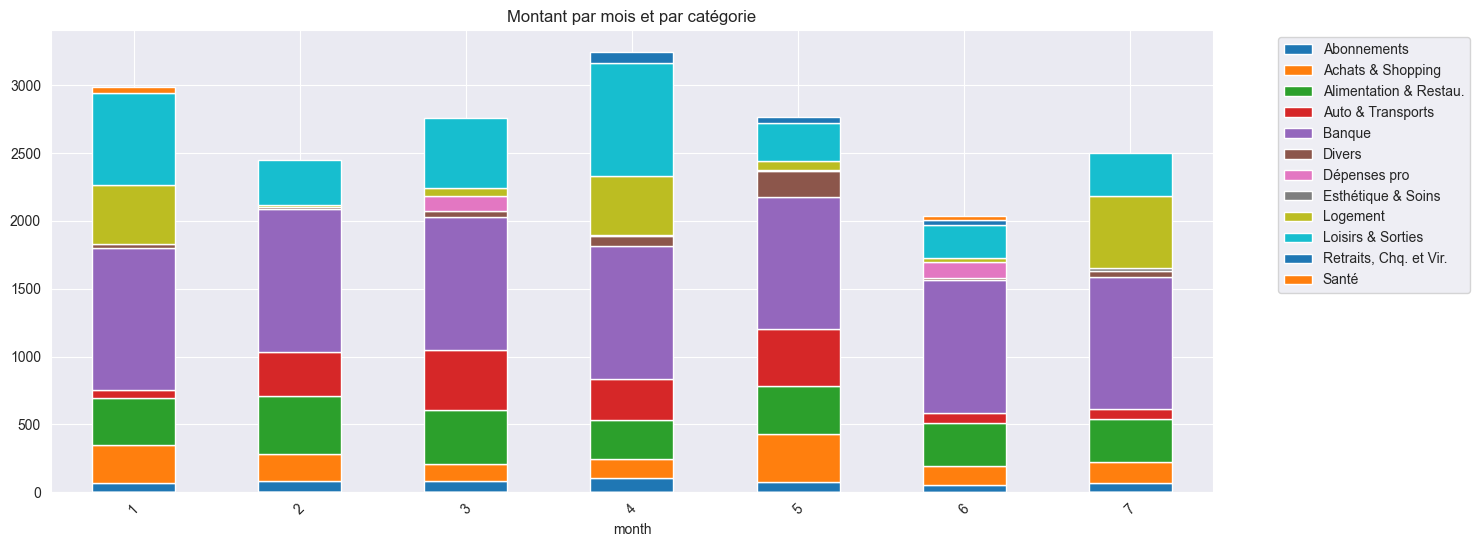

In [27]:
sum_df = df.drop(["Sous-Catégorie"], axis=1)
sum_df = sum_df.groupby(["month", "Catégorie"]).sum()
sum_df["Montant"].unstack(level=1).plot(
    figsize=(15, 6),
    kind='bar',
    stacked=True,
    grid=True,
    rot=45,
    label="Montant",
    title="Montant par mois et par catégorie"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
sum_df.head(10)


In [22]:
df2 = pd.read_csv('data.csv', sep=';')
df2['Date'] = pd.to_datetime(df2['Date'], format="%d/%m/%Y")
df2["month"] = df2["Date"].dt.month
df2.drop(["Date", "Note", "Pointée", "Compte"], axis=1, inplace=True)
df2.head()

print(df2["Catégorie"].unique())
# print(df2["Sous-Catégorie"].unique())

filtered_df = df2[df2["Catégorie"] == "Loisirs & Sorties"]
filtered_df = filtered_df[filtered_df["month"] == 1]

filtered_df

['Alimentation & Restau.' 'Loisirs & Sorties' "Entrées d'argent"
 'Dépenses pro' 'Auto & Transports' 'Divers' 'Achats & Shopping'
 'Abonnements' 'Logement' 'Retraits, Chq. et Vir.' 'Banque'
 'Esthétique & Soins' 'Santé']


,Description,Montant,Catégorie,Sous-Catégorie,month
39,Anais Martinez Hello T'es Frache,-15.00,Loisirs & Sorties,Divertissements,1
165,Prlv Fitness Clichy Sas F Magic Form Clichy Ma...,-29.90,Loisirs & Sorties,Sport,1
470,CB La Felicita,-7.50,Loisirs & Sorties,Sortie au restaurant,1
475,CB Newrest Wagons Lits Franc,-9.10,Loisirs & Sorties,Voyages / Vacances,1
480,CB L'entrecote,-33.90,Loisirs & Sorties,Sortie au restaurant,1
483,CB Newrest Wagons Lits Franc,-6.20,Loisirs & Sorties,Voyages / Vacances,1
484,CB Le Bouillon,-34.17,Loisirs & Sorties,Sortie au restaurant,1
486,CB La Favorite,-24.00,Loisirs & Sorties,Bars / Clubs,1
489,CB Mme Sarfati,-6.50,Loisirs & Sorties,Bars / Clubs,1
490,CB Sc.the Playce H,-19.50,Loisirs & Sorties,Bars / Clubs,1


In [8]:
sum_df = df.groupby(["Catégorie", "Sous-Catégorie", "month"]).sum()
sum_df = sum_df.groupby(["Catégorie", "Sous-Catégorie"]).sum()
sum_df

Montant
Catégorie              Sous-Catégorie                     
Abonnements            Abonnements - Autres          46.23
                       Internet                     262.92
                       Téléphonie mobile            227.86
Achats & Shopping      Achats & Shopping - Autres   418.97
                       Articles de sport             12.00
                       Cadeaux                      251.46
                       Vêtements/Chaussures         696.78
Alimentation & Restau. Alimentation - Autres        119.15
                       Café                          73.80
                       Fast foods                   491.42
                       Restaurants                  472.80
                       Supermarché / Epicerie      1300.49
Auto & Transports      Auto & Transports - Autres    29.55
                       Billets d'avion               97.98
                       Billets de train            1322.00
                       Carburant                    146.71
                       Location de véhicule          55.88
                       Stationnement                  5.75
                       Transports en commun          41.10
Banque                 Epargne                      150.00
                       Frais bancaires                8.00
                       Remboursement emprunt       6822.41
Divers                 A catégoriser                216.15
                       Assurance                    123.62
                       Autres dépenses                9.99
                       Tabac                         68.45
Dépenses pro           Frais d'expéditions            6.13
                       Frais juridique              110.63
                       Notes de frais                75.40
                       Services en ligne             41.23
Esthétique & Soins     Esthétique                    28.17
Logement               Assurance habitation         130.51
                       Charges diverses            1268.73
                       Décoration                     9.49
                       Electricité                  157.65
Loisirs & Sorties      Bars / Clubs                1017.10
                       Divertissements              221.00
                       Hôtels                        24.00
                       Loisirs & Sorties - Autres   119.33
                       Sortie au restaurant         137.26
                       Sorties culturelles          179.45
                       Sport                        669.30
                       Voyages / Vacances           825.15
Retraits, Chq. et Vir. Retraits                     170.00
Santé                  Pharmacie                     29.90
                       Santé - Autres                41.07

In [9]:
to_plot_df = sum_df.swaplevel().reset_index()
to_plot_df = to_plot_df.sort_values(by=["Montant"], ascending=False)
to_plot_df.head(10)

,Sous-Catégorie,Catégorie,Montant
21,Remboursement emprunt,Banque,6822.41
14,Billets de train,Auto & Transports,1322.00
11,Supermarché / Epicerie,Alimentation & Restau.,1300.49
32,Charges diverses,Logement,1268.73
35,Bars / Clubs,Loisirs & Sorties,1017.10
42,Voyages / Vacances,Loisirs & Sorties,825.15
6,Vêtements/Chaussures,Achats & Shopping,696.78
41,Sport,Loisirs & Sorties,669.30
9,Fast foods,Alimentation & Restau.,491.42
10,Restaurants,Alimentation & Restau.,472.80


In [10]:
labels = ["Origin"] + list(to_plot_df["Catégorie"].unique()) + list(to_plot_df["Sous-Catégorie"].unique())
mapped_labels = {k: v for v, k in enumerate(labels)}


m_source, m_target, m_value = [], [], []

for line in to_plot_df.iterrows():
    m_source.append(0)
    m_target.append(mapped_labels[line[1]["Catégorie"]])
    m_value.append(line[1]["Montant"])
    
    m_source.append(mapped_labels[line[1]["Catégorie"]])
    m_target.append(mapped_labels[line[1]["Sous-Catégorie"]])
    m_value.append(line[1]["Montant"])
    # break


In [11]:
fig = go.Figure(
  data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "€",

    node = dict(
      pad = 15,
      thickness = 50,
      line = dict(color = "black", width = 0.5),
      label = labels,
      # color = "blue"
    ),
    link = dict(
      source = m_source,
      target = m_target,
      value = m_value
  ))])

fig.update_layout(
  title_text="Basic Sankey Diagram", 
  # autosize=False,
  font_size=15,
  width=1500,
  height=1000,
  )
fig.show()

# Filter over one month

In [12]:
# df = pd.read_csv('data.csv', sep=';')
# df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
# df["month"] = df["Date"].dt.month
# df.drop(["Date", "Note", "Pointée", "Compte"], axis=1, inplace=True)
# df.head()

In [13]:
filtered_df = df[df["month"] == 1]
filtered_df = filtered_df.drop(["month"], axis=1)
filtered_df["Montant"] = filtered_df["Montant"].apply(lambda x: abs(x))
filtered_df.head()

,Montant,Catégorie,Sous-Catégorie
39,15.00,Loisirs & Sorties,Divertissements
41,9.99,Divers,Autres dépenses
44,3.45,Achats & Shopping,Cadeaux
45,12.35,Auto & Transports,Auto & Transports - Autres
157,75.00,Banque,Epargne


### Pie chart

,Montant
Catégorie,
Banque,1051.63
Loisirs & Sorties,682.27
Logement,430.44
Alimentation & Restau.,352.88
Achats & Shopping,278.78
Abonnements,66.97
Auto & Transports,52.62
Santé,41.07
Divers,27.65


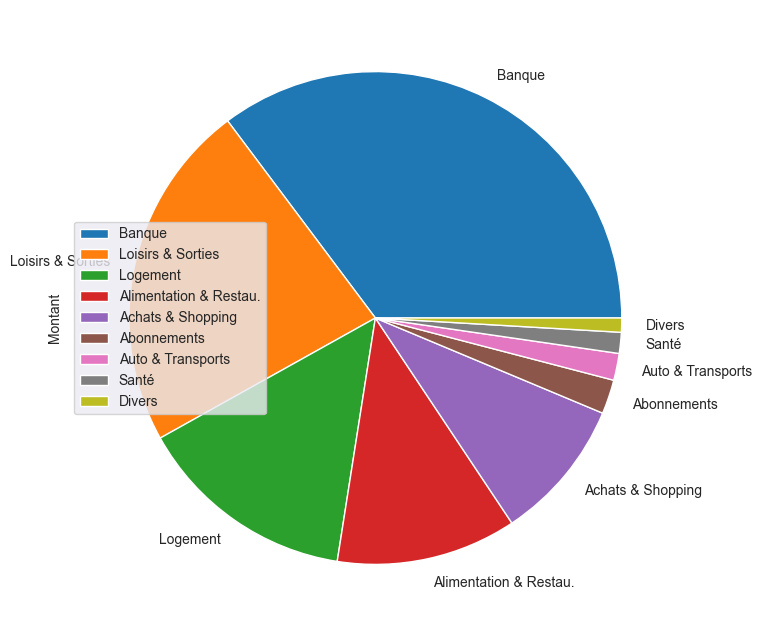

In [14]:
df_cat = filtered_df.drop(["Sous-Catégorie"], axis=1)
df_cat = df_cat.groupby(["Catégorie"]).sum()
df_cat = df_cat.sort_values(by="Montant", ascending=False)

df_cat.plot.pie(
    y="Montant",
    figsize=(8, 8),
)

df_cat

### Table on all sub category

In [15]:
grouped_df = filtered_df.groupby(["Catégorie", "Sous-Catégorie"]).sum()
grouped_df

Montant
Catégorie              Sous-Catégorie                     
Abonnements            Internet                      34.99
                       Téléphonie mobile             31.98
Achats & Shopping      Achats & Shopping - Autres   187.37
                       Cadeaux                       91.41
Alimentation & Restau. Alimentation - Autres          7.50
                       Café                           6.60
                       Fast foods                    88.40
                       Restaurants                   55.68
                       Supermarché / Epicerie       194.70
Auto & Transports      Auto & Transports - Autres    12.35
                       Carburant                     40.27
Banque                 Epargne                       75.00
                       Frais bancaires                2.00
                       Remboursement emprunt        974.63
Divers                 Assurance                     17.66
                       Autres dépenses                9.99
Logement               Assurance habitation          16.50
                       Charges diverses             376.98
                       Electricité                   36.96
Loisirs & Sorties      Bars / Clubs                  95.50
                       Divertissements               15.00
                       Sortie au restaurant          75.57
                       Sport                        479.90
                       Voyages / Vacances            16.30
Santé                  Santé - Autres                41.07

In [16]:
filtered_df.head()

,Montant,Catégorie,Sous-Catégorie
39,15.00,Loisirs & Sorties,Divertissements
41,9.99,Divers,Autres dépenses
44,3.45,Achats & Shopping,Cadeaux
45,12.35,Auto & Transports,Auto & Transports - Autres
157,75.00,Banque,Epargne
